# Transformada Discreta Wavelet

Implementacion de la transformada discreta wavelet

### Pythoon Library

libreria [PyWavelets](http://wavelets.pybytes.com), aqui se pueden encontrar todas las funciones Wavelet y sus filtros

### Referencias:

- [Multiresolution Decomposition](https://ieeexplore.ieee.org/document/192463)
- [Ten lectures on Wavelets](https://epubs.siam.org/doi/book/10.1137/1.9781611970104)
- [Mallat decomposition](https://ieeexplore.ieee.org/document/192463)




In [45]:
# !pip3 install PyWavelets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 1.4 MB/s eta 0:00:0000:0100:010m


In [48]:
import pywt # Libreria de wavelets

In [13]:
import numpy as np
import matplotlib.pyplot as plt

Las wavelets son un método que permite a partir del uso de una señal original o mejor conocida como Wavelet madre, realizar una reconstrucción de la señal de interés mediante la expansión, contracción de la señal (escalamiento y dilatación) y el desplazamiento de esta. También permiten realizar el denoising de una señal mediante el thresholding, método del que se hablará más adelante.

La transformada wavelet se puede realizar de tres maneras principalmente:
- Continua Wavelet Transform (CoWT)
- Discrete Wavelet Transform (DWT)
- Stationary Wavelet Transform (SWT)

Cada una de estas con posibilidad de realizar la función inversa (iCoWT, iDWT, iSWT), a estos procesos se les conoce como Análisis o Descomposición y Síntesis o Reconstrucción.


## Funciones Wavelet

### Wavelet Madre

Cada wavelet madre tiene asociada una función Wavelet y una función de escalamiento, en algunos casos puede llegar a tener una pareja para el proceso de análisis y otra pareja para el proceso de reconstrucción.

En el caso del DWT y SWT esto se hace a través de Wavelets ortonormales (ortogonales y normalizadas), las wavelets ortonormales está definida por la siguiente ecuación:

$\Psi_{j,k}(t) = 2^{-j/2}\Psi(2^{-j}t-k)$

Donde $j$ hace referencia al parámetro de escalamiento y dilatación y $k$ hace referencia al parámetro de desplazamiento.

### Wavelet Padre o funcion de escalamiento

Además, para analizar el dominio de datos en diferentes resoluciones, la wavelet madre cuenta con una función de escalamiento:

$\Phi(t) = \sum_{k=-1}^{N-2}{(-1)^k c_{k+1}\Psi(2t+k)}$

Donde $C_k$ son los coeficientes wavelet, para entender esto, es más sencillo pensar en los coeficientes como un filtro. Estos coeficientes son acomodados en una matriz de transformación que se aplica a un vector de datos. De esta forma se acomodan los coeficientes en dos patrones diferentes, uno que trabaja como un filtro desvanecedor (filtro pasa bajos) y otro como un patrón que muestra solo los “detalles” de la información (filtro pasa altos). A esta distribución de los filtros se le conoce en el “lenguaje de procesado de señales” como **filtros de espejo de cuadratura**.

### Descomposición en arbol de Mallat

Esto se conoce como descomposición en árbol de Mallat, por medio del cual una señal $x(n)$ se descompone en aproximaciones $a_j(n)$ y detalles $d_j(n)$ por el efecto de filtros pasa altos $hj(n)$ y pasa bajos $gj(n)$, teniendo en cuenta un proceso de diezmado $|2$ y el nivel de descomposición $n$.

![](../13_WaveletTransform/figures/Picture1.png)

### Funciones Madre y Padre

- Capitulo 7 [A Wavelet Tour of Sginal Processing](https://www.sciencedirect.com/book/9780123743701/a-wavelet-tour-of-signal-processing)


Suponga una funcion Wavelet $\Psi$ real. si su promedio es cero, la integral es:

$Wf(u,s) = \int_{-\infty}^{\infty}{f(t)\frac{1}{\sqrt{s}}\Psi^*(\frac{t-u}{s})dt}$

### Ejemplos:


### Funcion madre


funcion Wavelet llamada Mexican hats ([origen](https://en.wikipedia.org/wiki/Ricker_wavelet))

$\Psi(t) = \frac{2}{\pi^{1/4}\sqrt{3\sigma}}(\frac{t^2}{\sigma^2}-1)\exp(\frac{-t^2}{2\sigma^2})$

Su transformada de Fourier es:

$\hat{\Psi}(\omega) = \frac{-\sqrt{8}\sigma^{5/2}\pi^{1/4}}{\sqrt{3}}\omega^2\exp(\frac{-\sigma^2\omega^2}{2})$

la maxima escala es menor que 1 por que la funcion esta normalizada entre [0,1]

Text(0.5, 1.0, '-$\\hat{\\Psi}(\\omega)$')

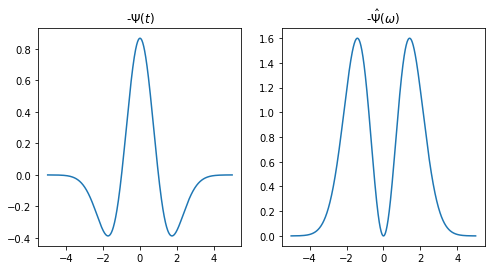

In [34]:
# asumiento sigma = 1

sig = 1

t = np.arange(-5,5,0.01)
w = np.arange(-5,5,0.01)

# Funcion madre Mexican Hat
psi = (2/(np.pi**(1/4)*(3*sig)**(1/2)))*((t**2)/(sig**2)-1)*np.exp((-t**2)/(2*sig**2))
# Transformada de fourier
hpsi = (-8**(1/2)*sig**(5/2)*np.pi**(1/4))/(3**(1/2))*w**2*np.exp((-sig**2*w**2)/(2))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(t,-psi)
plt.title('-$\Psi(t)$')
plt.subplot(1,2,2)
plt.plot(w,-hpsi)
plt.title('-$\hat{\Psi}(\omega)$')

### Funcion de Escalado

Esta funcion se emplea para completar la informacion faltante en la transformada Wavelet, el modulo de su transformada de Fouries es:

$|\hat{\Phi}(\omega)|^2=\int_{1}^{+\infty}{|\hat{\Psi}(s\omega)|^2}\frac{ds}{s}$

La funcion de fase $\hat{\Phi}(\omega)$ se puede seleccionar de forma libre. Su norma debe ser 1:

$\lim_{w\to 0}{|\hat{\Phi}(\omega)|^2} = C_{\Psi}$

### Funcion padre

Para el Mexican hats Wavelet, la transformada de fourier de la funcion de escalamiento es:

$\hat{\Phi}(\omega) = \frac{2\sigma^{3/2}\pi^{1/4}}{\sqrt{3}}\sqrt{\omega^2+\frac{1}{\sigma^2}}\exp(-\frac{\sigma^2\omega^2}{2})$


Text(0.5, 1.0, '$\\hat{\\Phi}(\\omega)$')

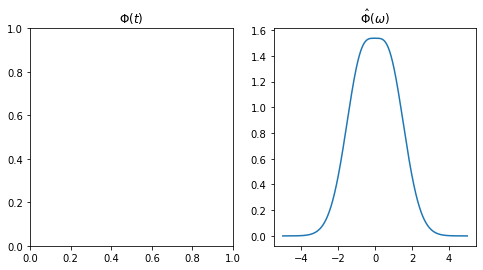

In [43]:
from scipy.fft import fft, ifft

# funcion padre, esta funcion no tiene una transformada inversa de fourier, la integral no esta definida
hphi = (2*sig**(3/2)*np.pi**(1/4))/(3**(1/2))*(w**2+(1/sig**2))**(1/2)*np.exp(-(sig**2*w**2/2))

phi = ifft(hphi) # No se encuentra asi, revisar


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
# plt.plot(t,phi.real)
plt.title('$\Phi(t)$')
plt.subplot(1,2,2)
plt.plot(w,hphi)
plt.title('$\hat{\Phi}(\omega)$')

## Haar Wavelet

Haar Wavelet ([Origen](https://en.wikipedia.org/wiki/Haar_wavelet))
 
- Mother Wavelet

$\psi (t)={\begin{cases}1\quad &0\leq t<{\frac  {1}{2}},\\-1&{\frac  {1}{2}}\leq t<1,\\0&{{otherwise.}}\end{cases}}$

- Scaling function

${\displaystyle \varphi (t)={\begin{cases}1\quad &0\leq t<1,\\0&{{otherwise.}}\end{cases}}}$

Text(0.5, 1.0, '$\\Psi(t)$')

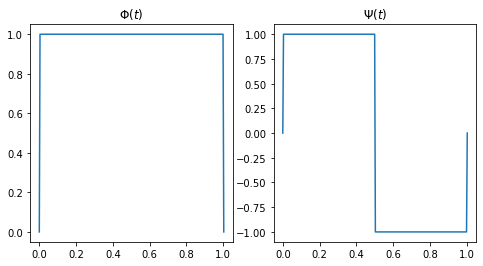

In [51]:
# mostrar la funcion Haar 

whaar = pywt.Wavelet('Haar')
(phiH, psiH, x) = whaar.wavefun()


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x,phiH)
plt.title('$\Phi(t)$')
plt.subplot(1,2,2)
plt.plot(x,psiH)
plt.title('$\Psi(t)$')

## Daubechies Wavelet

Daubechies Wavelet ([Origen](https://en.wikipedia.org/wiki/Daubechies_wavelet))

Text(0.5, 1.0, '$\\Psi(t)$')

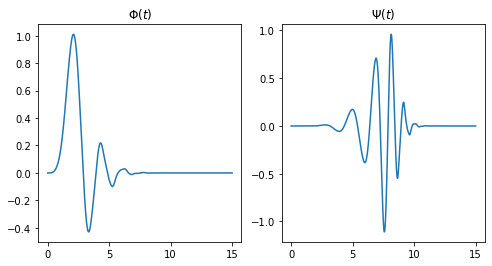

In [54]:
# mostrar la funcion Haar 

wdb = pywt.Wavelet('db8')
(phiD, psiD, x) = wdb.wavefun()


plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(x,phiD)
plt.title('$\Phi(t)$')
plt.subplot(1,2,2)
plt.plot(x,psiD)
plt.title('$\Psi(t)$')

## Reverse Biorthogonal

rbio family ([Descripcion](https://en.wikipedia.org/wiki/Biorthogonal_nearly_coiflet_basis))

Referencia [Link](http://wavelets.pybytes.com/wavelet/rbio1.3/)

Text(0.5, 1.0, '$\\Psi(t)$ Reconstruction')

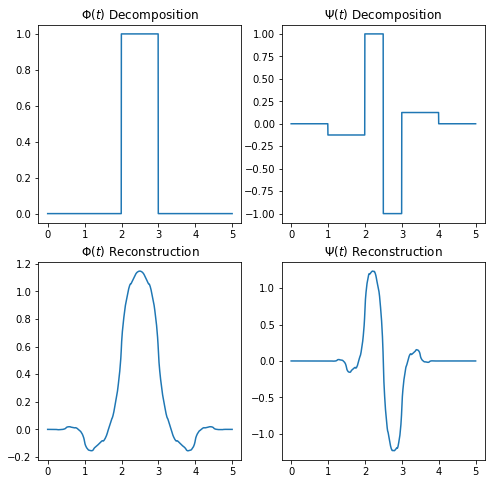

In [55]:
# mostrar la funcion rbio1.3 

wrb = pywt.Wavelet('rbio1.3')
(phiR1, psiR1, phiR2, psiR2, x) = wrb.wavefun()


plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.plot(x,phiR1)
plt.title('$\Phi(t)$ Decomposition')
plt.subplot(2,2,2)
plt.plot(x,psiR1)
plt.title('$\Psi(t)$ Decomposition')
plt.subplot(2,2,3)
plt.plot(x,phiR2)
plt.title('$\Phi(t)$ Reconstruction')
plt.subplot(2,2,4)
plt.plot(x,psiR2)
plt.title('$\Psi(t)$ Reconstruction')